# Banknote authentification problem

#### Clustering approach to classification and Decision Tree

Tvrtko Šapina, June 2025

#### *Aim of the project*

The objective of this project is to develop a classification model for determining the authenticity of banknotes by applying various techniques.

Although not originally classification algorithm, the first one used is K-Means clustering. It is used to identify centroids of each class, to which each data point will subsequently be associated via the Euclidian distance (the closest centroid determines class). 
Then, Decision Tree Classificier is used.
The data used in this project is sourced from the UCI Banknote Authentication dataset, which contains images of both genuine and forged banknote samples.

#### *Data info (from web page)*

The data was downloaded from [Banknote authentification dataset](https://archive.ics.uci.edu/dataset/267/banknote+authentication) (last accessed 24th April 2025, 10:25 AM) and its use and sharing is regulated by the CC BY 4.0 license. Data author is Volker Lohweg.

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images. 

Instances: 1372

*Features table*

| Variable Name| Role | Type | 	Description | Missing values| 
|:--------:|:--------:|:--------:|:--------:|:--------:|
|  Variance  |  Feature  |  Continuous   |Variance of Wavelet Transformed image | No | 
|  skewness   |   Feature   |  Continuous   |Skewness of Wavelet Transformed image |No | 
|  Curtosis   |  Feature   |  Continuous   |Curtosis of Wavelet Transformed image |No | 
|  Entropy   |  Feature   |  Continuous   |Entropy of image | No | 
|  Class   |  Target   |  Integer   |Banknote validity | No | 

#### *Data import*

Importing data into JupiterLab is in the cell below the cell with importing used libraries.

We will be working with all 4 variables listed in the section above.

In [4]:
import pandas as pd # used for data import from excell table
import matplotlib.pyplot as plt # used for visualisation
import numpy as np # used for numbers

In [5]:
nazivi_stat_varijabli = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'] # list containing names of statistical variables

df_klast = pd.read_csv('data_banknote_authentication.csv', header=None) # Import in a dataframe
df_klast.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


#### *Visualization and statistical description of a data set*
We are performing a data visualization of the dataset. Since we have four numerical variables, we will illustrate their relationships using a pairplot diagram, which shows the interactions between all features.

In [6]:
df_klast.columns = nazivi_stat_varijabli # Just a finesse to label dataframe columns

In [7]:
df_klast.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


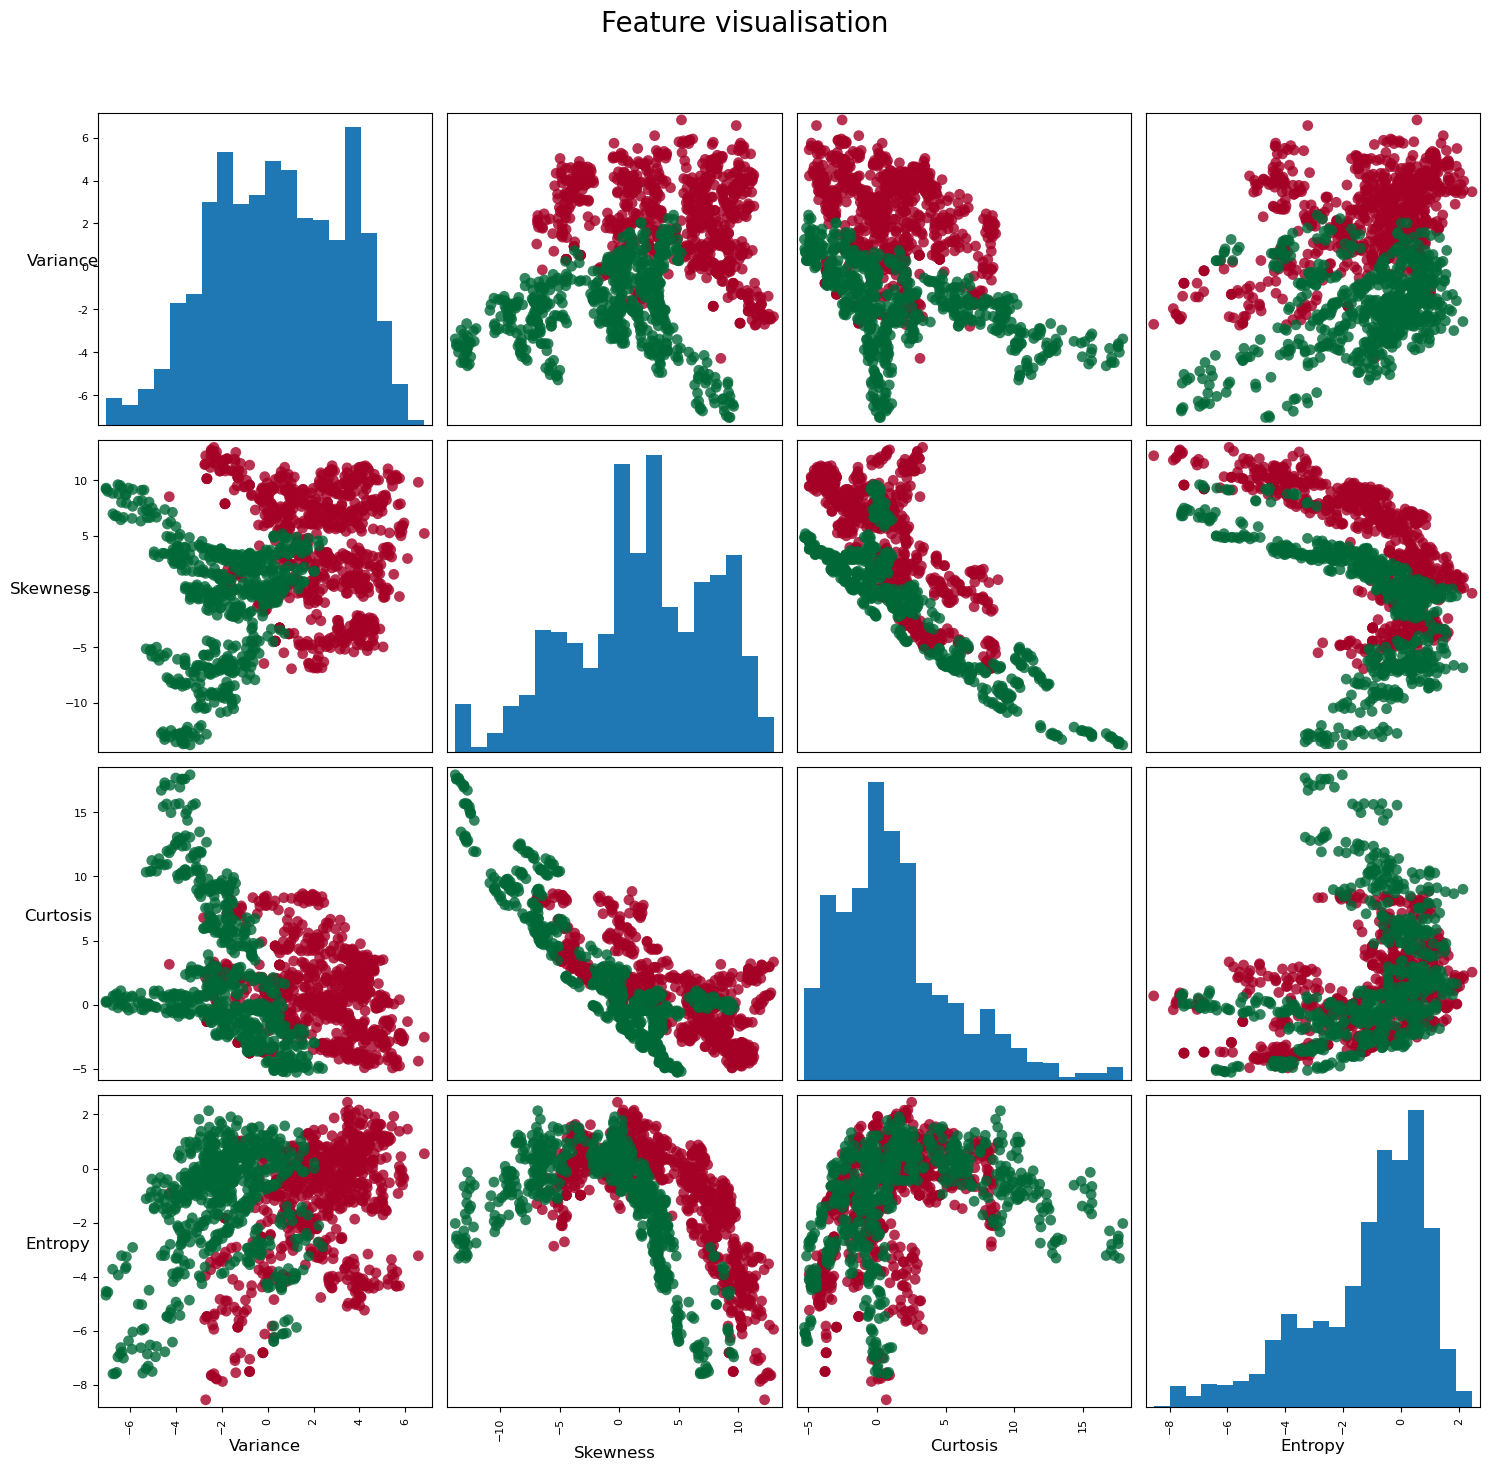

In [8]:
from pandas.plotting import scatter_matrix

pom1 = df_klast['Class'].values # extraction of class labels for labeling

grr = scatter_matrix(df_klast.drop(columns=['Class']), figsize=(15, 15), c=pom1, marker='o',
                     hist_kwds={'bins': 20}, s=60, alpha=0.8, cmap=plt.cm.RdYlGn) 

# RED – Forged banknotes
# GREEN – Genuine banknotes

plt.suptitle('Feature visualisation', fontsize=20)
for ax in grr.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, rotation=0)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12, rotation=0, labelpad=10)
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### *Data preparation (Normalisation and separation on training and test set)*
From the statistical description of the dataset, we observe that the values of individual variables fall within different ranges.

Many machine learning algorithms, especially those that rely on distance calculations or gradient-based optimization, can benefit from normalization. Features with larger numerical ranges can disproportionately influence the model's performance, as algorithms like K-means, KNN, and linear models may place more importance on variables with larger values (in our case we are working with Eucledian distance). In other words, components with larger absolute values may dominate the distances and distort the clustering outcomes. Normalizing the data helps ensure that all features contribute equally, leading to more balanced and effective model training.

For this reason, we will perform normalization — all values of the statistical variables will be scaled within the range [0,1].

From the histograms in the previous statistical overview, we observe that the variables 'Entropy' and 'Curtosis' have distributions that are approximately Gaussian in shape (albeit shifted), while the other variables show distributions closer to uniform.

Therefore, we will apply MinMax normalization. First, we import `MinMaxScaler()` from sklearn.preprocessing, then use it to scale the data, after which we split the data into training and test subsets for applying the K-means algorithm.

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(df_klast[:-1]) # The last column in the dataframea is target so it is being left out
df_klast_skal = pd.DataFrame(scaler.transform(df_klast[:-1]), columns= nazivi_stat_varijabli)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Splitting normalised data set on test and trening set

X_klast_train, X_klast_test, y_klast_train, y_klast_test = train_test_split(df_klast_skal.drop('Class', axis = 1), 
                                                                            df_klast_skal['Class'], 
                                    random_state=104,  
                                   test_size= 0.25,  
                                   shuffle=True) 

In [13]:
X_klast_train.describe()

,Variance,Skewness,Curtosis,Entropy
count,1028.000000,1028.000000,1028.000000,1028.000000
mean,0.537593,0.585782,0.288502,0.667856
std,0.206735,0.220807,0.190254,0.191564
min,0.000000,0.000000,0.000000,0.000000
25%,0.376631,0.459854,0.156464,0.552381
50%,0.535776,0.601470,0.251420,0.724341
75%,0.711437,0.769608,0.363695,0.813288
max,1.000000,1.000000,1.000000,1.000000


In [14]:
X_klast_test.describe()

,Variance,Skewness,Curtosis,Entropy
count,343.000000,343.000000,343.000000,343.000000
mean,0.544297,0.592137,0.286030,0.671464
std,0.199908,0.216499,0.171712,0.189636
min,0.005928,0.010298,0.010627,0.087246
25%,0.382840,0.424312,0.167594,0.582072
50%,0.548984,0.611767,0.261035,0.720637
75%,0.707097,0.776809,0.374926,0.812348
max,0.947148,0.987068,0.989222,0.973904


With these two `.describe()` methods, we have examined both the test and training sets, as we previously normalized the data and then split it. We observe that the distributions in both sets are very similar. There could have been a situation where the sets degenerate — for instance, if the test set contained exclusively extreme values of a particular variable. In such a case, applying the K-means algorithm would not have been equally successful on both the test and training sets, which could indicate overfitting of the model.
## Clustering
The idea is that our dataset contains two clusters, each representing one part of the set — genuine banknotes or forged ones. After applying the KMeans algorithm, we check which centroid each point is closer to — the one corresponding to the genuine banknotes or the forged ones — and classify it accordingly. In this way, although it is an unsupervised learning approach, we use clustering to build a simple classification model.
#### *Dimensionality reduction*

From the pair plot in the previous part of the analysis, we conclude that there is a strong linear correlation among some of the variables. Therefore, we will use Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. In addition to removing redundancy, dimensionality reduction can improve the accuracy of the K-means algorithm by reducing the impact of noise and decreasing the complexity of the space.

First, we will analyze the percentage of the total variance in the dataset that is retained after dimensionality reduction. In principle, anything that can be reduced to three or fewer components is considered suitable, as it allows for the visualization of both 2D and 3D projections of the data.

In [15]:
from sklearn.decomposition import PCA

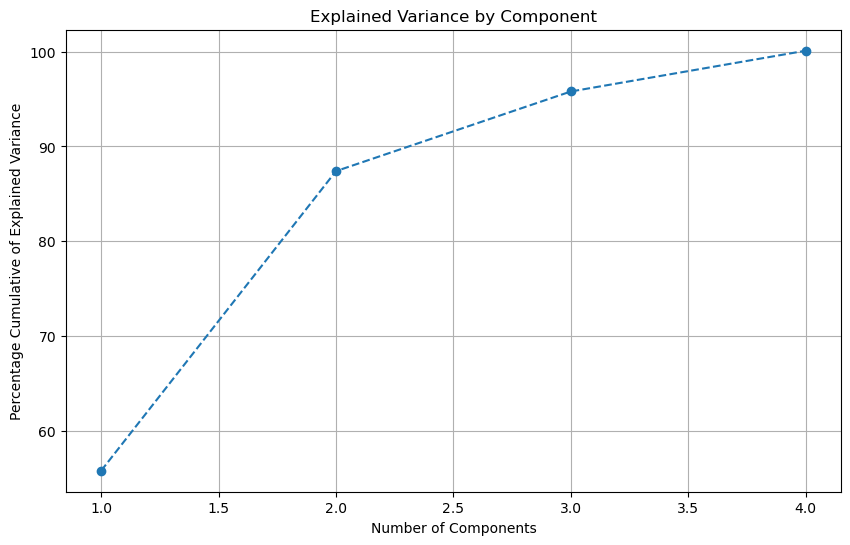

In [16]:
pca = PCA()
pca.fit(X_klast_train)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

We observe that for two dimensions, our dataset retains over 85% of the total information, while for three dimensions, it retains over 95%. Therefore, for the further analysis, we will apply PCA with three dimensions in order to preserve as much information as possible while also enabling visualization in a 3D space.

#### *Three dimensional PCA*

In [17]:
pca = PCA(n_components = 3)
pca.fit(X_klast_train) # applying PCA
scores_pca = pca.transform(X_klast_train) 
scores_pca # this is NumPy array containing 3 components; PCA1, PCA2, PCA3

array([[-0.22566463, -0.15232939,  0.06560416],
       [-0.02460528,  0.06961992,  0.11386249],
       [ 0.20387182, -0.18588079,  0.02309482],
       ...,
       [-0.54683523, -0.24145181, -0.14844994],
       [-0.18481888, -0.10457912, -0.07078569],
       [ 0.27288365, -0.10459728,  0.02839252]])

In [18]:
# creating new numPy array used for validating KMeans later on
merged_array = np.column_stack((scores_pca, y_klast_train)) 
merged_array

array([[-0.22566463, -0.15232939,  0.06560416,  0.        ],
       [-0.02460528,  0.06961992,  0.11386249,  1.        ],
       [ 0.20387182, -0.18588079,  0.02309482,  1.        ],
       ...,
       [-0.54683523, -0.24145181, -0.14844994,  1.        ],
       [-0.18481888, -0.10457912, -0.07078569,  0.        ],
       [ 0.27288365, -0.10459728,  0.02839252,  0.        ]])

In [19]:
pca_data = pd.DataFrame(merged_array) # mereg_array to dataframe

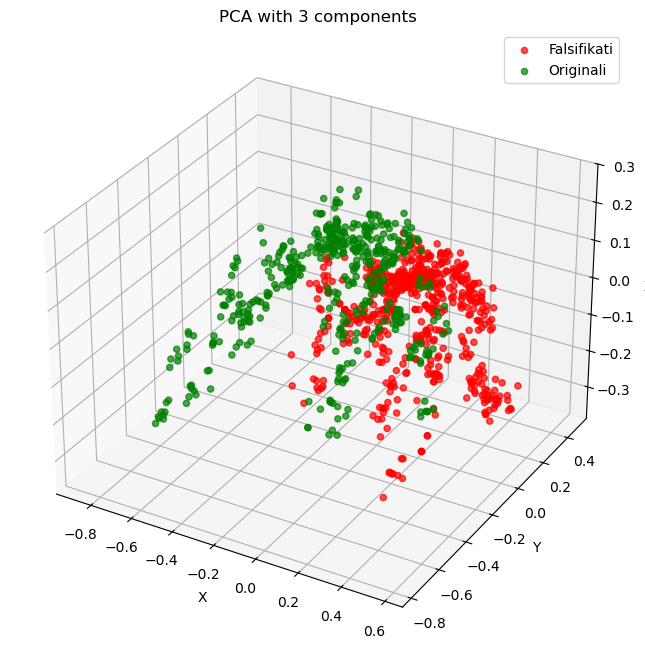

In [20]:
fig = plt.figure(111,figsize = (10,8))
ax = fig.add_subplot(projection='3d')

for j in range(2): # j is 0- condition for forged OR 1- condition for genuine banknotes
        pom_list1 = ['Falsifikati', 'Originali', 'red', 'green']
        cond = pca_data[3] == j #
        pca_data_pom1 = pca_data[cond] # dataframe contains only forged banknotes in the first iteration and just genuine in the second

        X1=pca_data_pom1[0]
        X2=pca_data_pom1[1]
        X3=pca_data_pom1[2]
    
        ax.scatter(X1, X2, X3, alpha = 0.7, label = pom_list1[j], color = pom_list1[j+2])

# ax.scatter([ 0.24269221], [-0.07156019], [-0.00312845], label = 'Centroids of the Forged Clusters, color = 'black', marker = '^', s = 120) # Centroids of the Forged Clusters
# ax.scatter([-0.22892894],  [0.06750196],  [0.00295103], label = 'Centroids of the Genuine Clusters', color = 'purple', marker = 'v', s = 120) # Centroids of the Genuine Clusters  
ax.set_title('PCA with 3 components')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

From the visualization of the dataset after applying PCA, we observe that the data is generally grouped, but some overlap still exists between the individual sets. In other words, while certain clusters are apparent, complete separation between the data points is not achieved, and the boundaries are neither clear nor well-defined. This suggests that after applying the K-means algorithm, challenges may arise in classifying certain points, potentially leading to unclear boundaries between the clusters.

#### *Applying the KMeans Algorithm with Two Clusters*

The KMeans algorithm is always iterated multiple times, as it is possible that in a given iteration, the initial positions of the centroids are incorrectly determined, which can lead to a local minimum and a poorer final solution. By running the algorithm multiple times with different initializations, we increase the likelihood of finding more globally optimal clusters.

In [21]:
from sklearn.cluster import KMeans

In [22]:
model = KMeans(n_clusters = 2,  n_init="auto") 
model.fit(scores_pca) # applying KMeansa on our pca values
model.cluster_centers_ # getting centroids location

array([[-0.22712245,  0.06707406,  0.00363409],
       [ 0.24455811, -0.07222318, -0.00391307]])

In [23]:
model = KMeans(n_clusters = 2,  n_init="auto")
model.fit(scores_pca)
model.cluster_centers_

array([[-0.22892894,  0.06750196,  0.00295103],
       [ 0.24269221, -0.07156019, -0.00312845]])

In [24]:
model = KMeans(n_clusters = 2,  n_init="auto")
model.fit(scores_pca)
model.cluster_centers_

array([[ 0.24648394, -0.0744276 , -0.00437575],
       [-0.22449281,  0.06778722,  0.00398535]])

#### *Model validation*

The following three cells display two auxiliary functions: `suma_kvadrata`, which calculates the square of the Euclidean distance, and `validacija_Kmeans`, which evaluates the clustering performance. The `validacija_Kmeans` function iterates through all the points in the dataset, checks which centroid they are closest to, and classifies the banknote as either genuine or forged based on that. This provides insight into the accuracy of the KMeans algorithm with the given cluster configuration.

In [25]:
def suma_kvadrata(a, b): # a and b are lists containing coordinates of two vectors 
    rj = 0
    if len(a) != len(b):
        print('ERROR: Lists a and b are of unequal length')
        return -1
    for i in range(len(a)):
        rj += (a[i]-b[i])* (a[i]-b[i])
    return rj

In [26]:
def validacija_Kmeans(centar1, centar2, arr, distanca): # arr is array; distanca is function
    prvi_centar = [0,0] # The first is the number of forgeries, and the second is the number of genuine banknotes in the forged cluster
    drugi_centar = [0,0] # The first is the number of forgeries, and the second is the number of genuine banknotes in the forged cluster
    for lista in arr:
        if distanca(centar1, lista[:-1]) > distanca(centar2, lista[:-1]):
            if lista[-1] <0.5:
                drugi_centar[0]+=1
            else:
                drugi_centar[1]+=1
        else:
            if lista[-1] <0.5:
                prvi_centar[0]+=1
            else:
                prvi_centar[1]+=1
                
    return [prvi_centar, drugi_centar]

In [27]:
validacija_Kmeans([ 0.24269221, -0.07156019, -0.00312845], [-0.22892894,  0.06750196,  0.00295103], merged_array, suma_kvadrata)

[[317, 180], [248, 283]]

From the results, we conclude that our model is highly unreliable. In the test set, the centroid corresponding to forgeries misclassified 180 out of 497 cases, while the situation for the second cluster — corresponding to genuine banknotes — is even worse: 248 out of 531 banknotes were misclassified.

These results stem from the fact that we applied the KMeans algorithm to the entire dataset without considering the class. The algorithm finds centroids based on geometric distance, not on actual classes, so the clustering distribution does not necessarily align with the classification into genuine and forged banknotes.

For this reason, we will now apply KMeans separately for each group to better understand their internal structure.

In [28]:
cond_f = pca_data[3] == 0 # conditin for forgeries
cond_o = pca_data[3] == 1 # condition for genuines

pca_data_falsifikati = pca_data[cond_f] # dataframe containing forgeries
pca_data_originali = pca_data[cond_o] # dataframe containing genuines

In [29]:
# separating the values in the dataset into genuine and forged banknotes
pca_data_falsifikati = pca_data_falsifikati.drop(pca_data_falsifikati.columns[3], axis=1) 
pca_data_originali = pca_data_originali.drop(pca_data_originali.columns[3], axis=1)

In [30]:
pca_data_falsifikati # organizing the data to enable the application of KMeans on the dataframe

,0,1,2
0,-0.225665,-0.152329,0.065604
4,0.349583,0.176668,0.024724
7,0.508868,0.140107,-0.177286
8,-0.037434,0.223676,0.003944
11,0.024578,0.075509,0.012918
...,...,...,...
1021,0.171953,0.195947,-0.007042
1023,0.267387,-0.012854,0.022486
1024,0.053209,0.260349,-0.020737
1026,-0.184819,-0.104579,-0.070786


In [31]:
# Forgeries - KMeans and centroid output
model = KMeans(n_clusters = 1,  n_init="auto")
model.fit(pca_data_falsifikati)
model.cluster_centers_

C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([[ 0.11899931,  0.09982347, -0.04812859]])

In [32]:
# Forgeries - KMeans and centroid output
model = KMeans(n_clusters = 1,  n_init="auto")
model.fit(pca_data_falsifikati)
model.cluster_centers_

C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([[ 0.11899931,  0.09982347, -0.04812859]])

In [33]:
# Genuines - KMeans and centroid output
model = KMeans(n_clusters = 1,  n_init="auto")
model.fit(pca_data_originali)
model.cluster_centers_

C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([[-0.14521514, -0.12181482,  0.05873144]])

In [34]:
# Genuines - KMeans and centroid output
model = KMeans(n_clusters = 1,  n_init="auto")
model.fit(pca_data_originali)
model.cluster_centers_

C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([[-0.14521514, -0.12181482,  0.05873144]])

In [35]:
validacija_Kmeans([ 0.11899931,  0.09982347, -0.04812859], [-0.14521514, -0.12181482,  0.05873144], merged_array, suma_kvadrata)

[[489, 99], [76, 364]]

With this approach, we have certainly managed to build a significantly better classifier. It is important to note that we are still working with the training dataset, meaning these results do not include a test of the model’s generalization.

Next, we will visualize the misclassified points to identify exactly where the model is making errors and whether there are any patterns in these mistakes.

C:\Users\TvrtkoSapina\AppData\Local\Temp\ipykernel_10536\1738401427.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


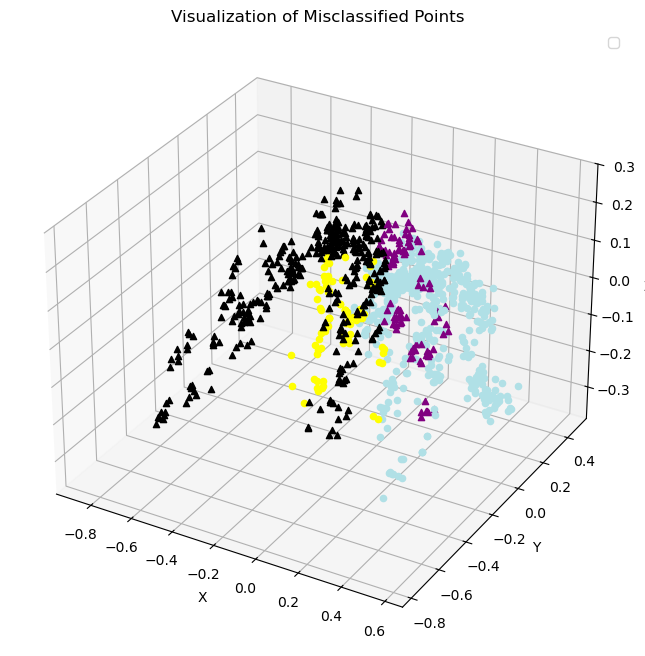

In [36]:
fig = plt.figure(111,figsize = (10,8))
ax = fig.add_subplot(projection='3d')

centar1 = [ 0.11899931,  0.09982347, -0.04812859]
centar2 = [-0.14521514, -0.12181482,  0.05873144]
arr = merged_array 
distanca = suma_kvadrata 

prvi_centar = [0,0] # The first is the number of forgeries, and the second is the number of genuine banknotes
drugi_centar = [0,0] # The first centroid represents forgeries, and the second centroid represents genuine banknotes.
for lista in arr:
    if distanca(centar1, lista[:-1]) > distanca(centar2, lista[:-1]):
        if lista[-1] <0.5:
            drugi_centar[0]+=1
            ax.scatter(lista[0], lista[1], lista[2], color = 'yellow')  # label = 'Well classificied genuine banknotes',
        else:
            drugi_centar[1]+=1
            ax.scatter(lista[0], lista[1], lista[2],  color = 'black', marker = '^') # label = 'Forged banknotes classificied as genuine',
    else:
        if lista[-1] <0.5:
            prvi_centar[0]+=1
            ax.scatter(lista[0], lista[1], lista[2], color = 'powderblue') # label = 'Well classificied forged banknotes',
        else:
            prvi_centar[1]+=1
            ax.scatter(lista[0], lista[1], lista[2], color = 'purple', marker = '^') # Genuine banknotes classificied as forged

ax.set_title('Visualization of Misclassified Points')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


We observe that the boundaries between the classes are not straightforward, which suggests that two clusters are insufficient to adequately describe the internal structure of the data. Therefore, we will attempt a finer division — we will apply KMeans with more clusters for each group (both for genuine and forged banknotes) in order to build a more accurate classifier.

#### *Determining the Optimal Number of Clusters*

To determine the optimal number of clusters, we will use three different methods: the Elbow Method (inertia), the Calinski-Harabasz Index, and the Silhouette Method.

We will iterate through the number of clusters from 2 to 11 and for each number, calculate the values of all three metrics for the KMeans algorithm. Based on the resulting graphs, we can visually determine the optimal number of clusters:

- For the Elbow Method, the optimal value is where the graph "bends" (the most pronounced angle),

- For the Calinski-Harabasz Index, we select the maximum value,

- For the Silhouette Method, we also look for the peak value (maximum).

We begin the analysis by determining the optimal number of clusters for the forgeries.

In [37]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to 

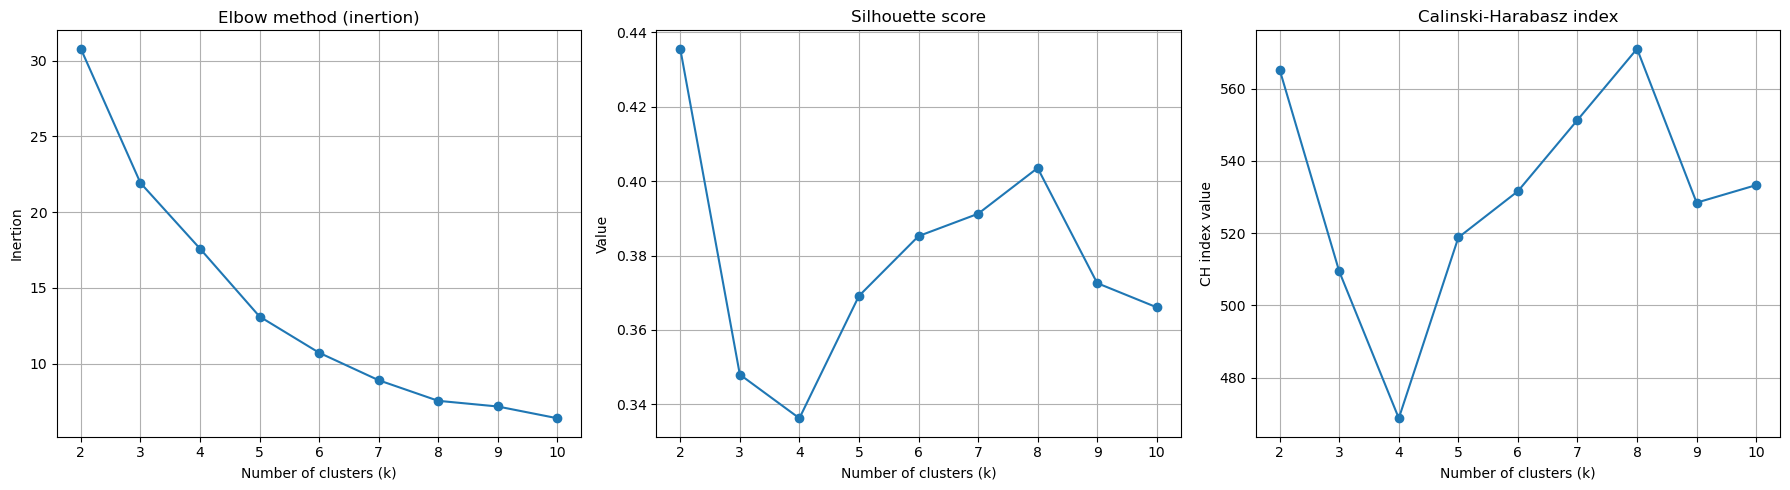

In [38]:
# Range of number of clusters we are exploring
range_n_clusters = range(2, 11)

# Empty lists for metrics data
inertia_scores = []
silhouette_scores = []
ch_scores = []

# One loop for all 3 methods
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data_falsifikati)  # uses PCA-reducted data
    labels = kmeans.labels_
    
    inertia_scores.append(kmeans.inertia_)  # elbow method
    silhouette_scores.append(silhouette_score(pca_data_falsifikati, labels))  # Silhuette
    ch_scores.append(calinski_harabasz_score(pca_data_falsifikati, labels))  # CH index

# Plotting all three graphs 
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Elbow method
axs[0].plot(range_n_clusters, inertia_scores, marker='o')
axs[0].set_title("Elbow method (inertion)")
axs[0].set_xlabel("Number of clusters (k)")
axs[0].set_ylabel("Inertion")
axs[0].grid(True)

# Silhouette score
axs[1].plot(range_n_clusters, silhouette_scores, marker='o')
axs[1].set_title("Silhouette score")
axs[1].set_xlabel("Number of clusters (k)")
axs[1].set_ylabel("Value")
axs[1].grid(True)

# Calinski-Harabasz index
axs[2].plot(range_n_clusters, ch_scores, marker='o')
axs[2].set_title("Calinski-Harabasz index")
axs[2].set_xlabel("Number of clusters (k)")
axs[2].set_ylabel("CH index value")
axs[2].grid(True)

plt.tight_layout()
plt.show()


C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to 

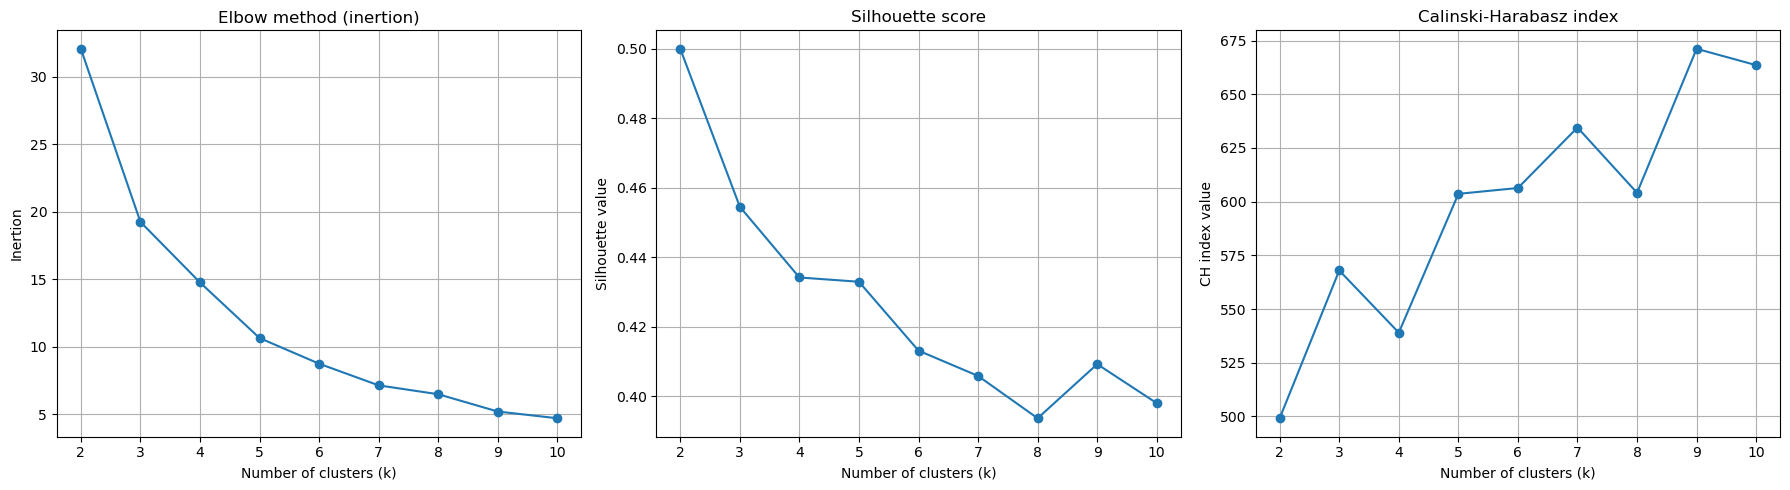

In [39]:
# Range of number of clusters we are exploring
range_n_clusters = range(2, 11)

# Empty lists for metrics data
inertia_scores = []
silhouette_scores = []
ch_scores = []

# One loop for all 3 methods
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data_originali)  # uses PCA-reducted data
    labels = kmeans.labels_
    
    inertia_scores.append(kmeans.inertia_)  # Elbow method
    silhouette_scores.append(silhouette_score(pca_data_originali, labels))  # Silhuette
    ch_scores.append(calinski_harabasz_score(pca_data_originali, labels))  # CH index

# Plotting all three graphs
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Elbow method
axs[0].plot(range_n_clusters, inertia_scores, marker='o')
axs[0].set_title("Elbow method (inertion)")
axs[0].set_xlabel("Number of clusters (k)")
axs[0].set_ylabel("Inertion")
axs[0].grid(True)

# Silhouette score
axs[1].plot(range_n_clusters, silhouette_scores, marker='o')
axs[1].set_title("Silhouette score")
axs[1].set_xlabel("Number of clusters (k)")
axs[1].set_ylabel("Silhouette value")
axs[1].grid(True)

# Calinski-Harabasz index
axs[2].plot(range_n_clusters, ch_scores, marker='o')
axs[2].set_title("Calinski-Harabasz index")
axs[2].set_xlabel("Number of clusters (k)")
axs[2].set_ylabel("CH index value")
axs[2].grid(True)

plt.tight_layout()
plt.show()


From the graphs, we observe that the optimal number of clusters is 3 for both forgeries and genuine banknotes. Although a higher granularity could technically be used, our goal is to find the smallest number of clusters that still adequately describes the data. A smaller number of clusters reduces the likelihood of misclassifying points from the opposite set, as fewer clusters mean less overlap and simpler boundaries between the sets. Therefore, we will proceed with the analysis using three clusters for each group.

#### *KMeans Algorithm for Multiple Clusters*

In [40]:
# Forges - KMeans and centroid output
model = KMeans(n_clusters = 3,  n_init="auto")
model.fit(pca_data_falsifikati)
model.cluster_centers_

C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([[ 0.13519416,  0.22617571,  0.00542451],
       [ 0.3722503 , -0.12641327, -0.0866005 ],
       [-0.18482986,  0.15730577, -0.08707037]])

In [41]:
# Forges - KMeans and centroid output
model = KMeans(n_clusters = 3,  n_init="auto")
model.fit(pca_data_falsifikati)
falsifikati_array = model.cluster_centers_

C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [42]:
# Genuines - KMeans and centroid output
model = KMeans(n_clusters = 3,  n_init="auto")
model.fit(pca_data_originali)
model.cluster_centers_

C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([[-0.07228481, -0.01052496,  0.15057758],
       [-0.56052643, -0.1316354 , -0.06412213],
       [ 0.18577425, -0.31532613,  0.02750834]])

In [43]:
# Genuines - KMeans and centroid output
model = KMeans(n_clusters = 3,  n_init="auto")
model.fit(pca_data_originali)
originali_array = model.cluster_centers_

C:\Users\TvrtkoSapina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


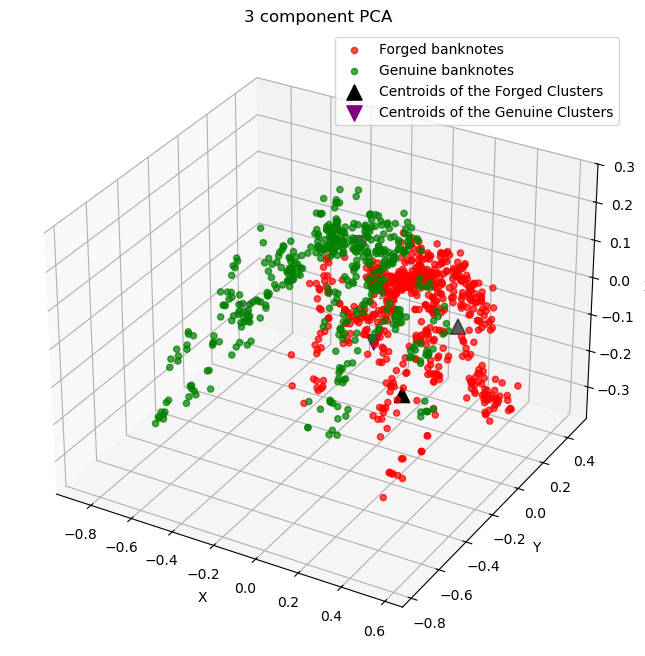

In [44]:
fig = plt.figure(111,figsize = (10,8))
ax = fig.add_subplot(projection='3d')

for j in range(2): # j is 0- condition for forged banknotes OR 1- condition for genuine banknotes
        pom_list1 = ['Forged banknotes', 'Genuine banknotes', 'red', 'green']
        cond = pca_data[3] == j #
        pca_data_pom1 = pca_data[cond] # dataframe contains only forged banknotes in the first iteration and just genuine in the second

        X1=pca_data_pom1[0]
        X2=pca_data_pom1[1]
        X3=pca_data_pom1[2]
    
        ax.scatter(X1, X2, X3, alpha = 0.7, label = pom_list1[j], color = pom_list1[j+2])

ax.scatter([0.32312368, -0.08972711, 0.32718354], [0.09297259, 0.20551436, -0.32582966],[-0.04040347,-0.04597098,-0.08291548], label = 'Centroids of the Forged Clusters', color = 'black', marker = '^', s = 120) # Centroids of the Forged Clusters
ax.scatter([-0.56052643, 0.18519132, -0.07316927], [-0.1316354, -0.31345027, -0.01013501],  [-0.06412213, 0.02768752, 0.15105387], label = 'Centroids of the Genuine Clusters', color = 'purple', marker = 'v', s = 120) # Centroids of the Genuine Clusters 
ax.set_title('3 component PCA')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

#### *Validation*

Below is the `validacija_vise_klastera` function, which is essentially a multi-cluster version of the `validacija_KMeans` function from the previous section.

In [45]:
def validacija_vise_klastera(centri_fals, centri_orig, arr, distanca): # arr is array; distanca is function
    # centri_fals and centri_otig are also array type
    prvi_centar = [0,0] # The first is the number of forgeries, and the second is the number of genuine banknotes in the forge banknotes cluster
    drugi_centar = [0,0] # The first is the number of forgeries and the second is the number of genuine banknotes in the genuine banknotes cluster
    for lista in arr:
        pom1 = [] # distance from centra_falsifikata 
        pom2 = [] # distance from centra_originala
        for i in centri_fals:
            pom1.append(distanca(lista[:-1], i))
        for i in centri_orig:
            pom2.append(distanca(lista[:-1], i))
            
        centar1 = min(pom1)
        centar2 = min(pom2)
        
        if centar1 > centar2:
            if lista[-1] <0.5:
                drugi_centar[0]+=1
            else:
                drugi_centar[1]+=1
        else:
            if lista[-1] <0.5:
                prvi_centar[0]+=1
            else:
                prvi_centar[1]+=1
                
    return [prvi_centar, drugi_centar]

In [46]:
validacija_vise_klastera(falsifikati_array, originali_array, merged_array, suma_kvadrata) # trainning data

[[493, 50], [72, 413]]

We can see that we have further improved our classifier obtained through the KMeans algorithm compared to the previously achieved results ([[489, 99], [76, 364]]). However, clustering has proven not to be the most suitable approach for this problem, as it does not use information about the classes (the target variable) and relies solely on the geometric structure of the data, measured by Euclidean distance. This could either be due to the intrinsic structure of the data (geometric form) or because the algorithm does not understand which centroid each point should be closer to/ further from.

Therefore, we will proceed to build a classifier based on a decision tree, which has the potential to achieve higher accuracy and better interpretability.
## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_klast_train, y_klast_train)

DecisionTreeClassifier(random_state=0)

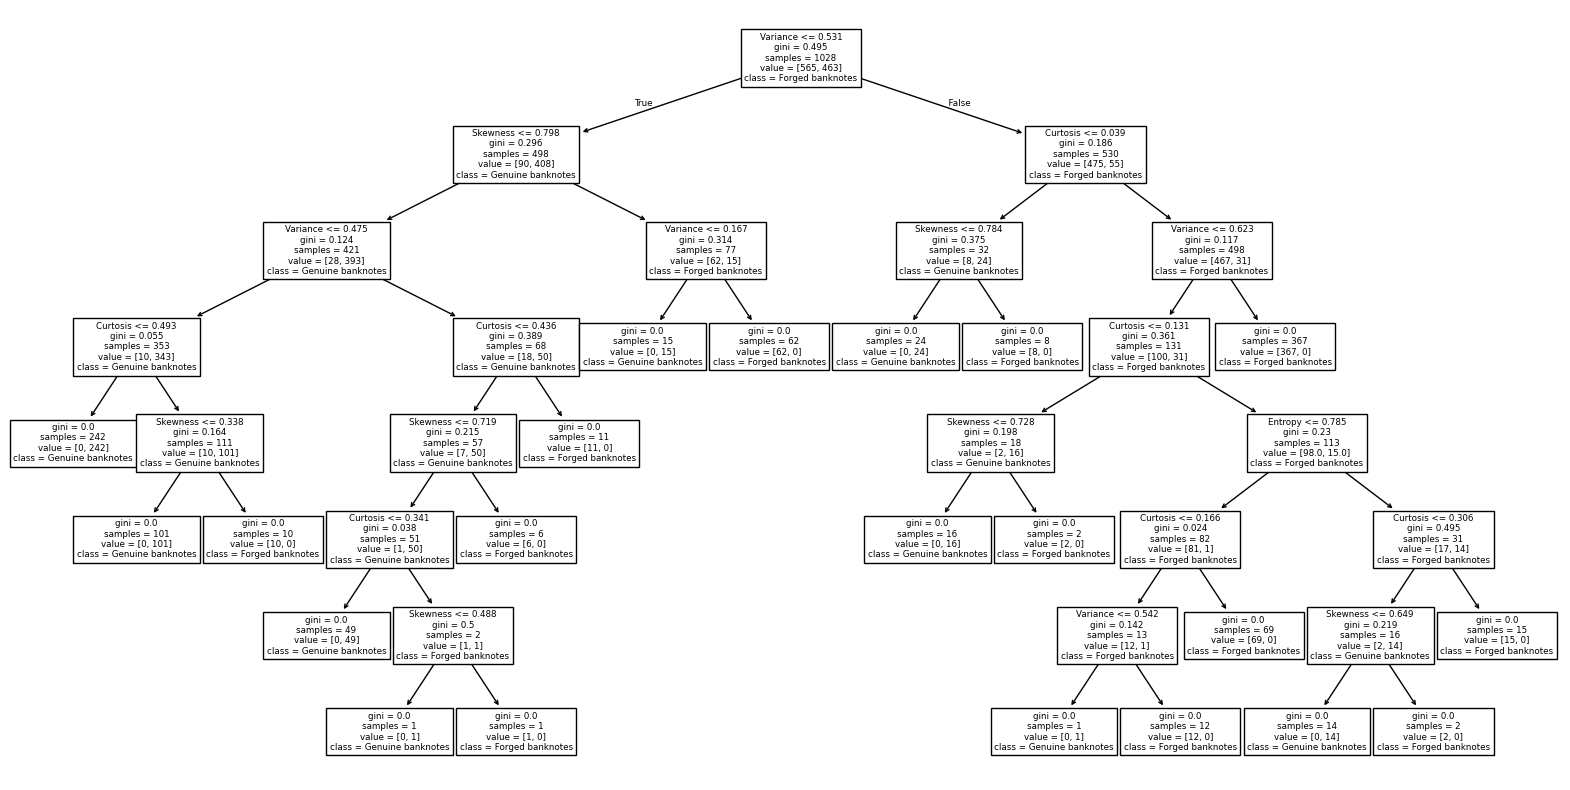

In [50]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'], class_names=['Forged banknotes', 'Genuine banknotes'])
plt.show()

#### *Validation*

In [51]:
from sklearn import metrics

y_pred = clf.predict(X_klast_test)
cnf_matrix = metrics.confusion_matrix(y_klast_test, y_pred)
cnf_matrix

array([[196,   1],
       [  4, 142]])

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_klast_train, y_klast_train, cv=5)
accuracy = scores.mean()
accuracy

np.float64(0.9854084773857448)

Based on the confusion matrix shown [[196, 1], [4, 142]] and the achieved accuracy of 98.54%, we conclude that the decision tree is much more successful classifier for this dataset than the first method. The model has accurately distinguished between genuine and forged banknotes, with a minimal number of misclassifications — only 5 in total across the entire test set.

The high accuracy and the clear interpretability of the decisions make the decision tree a very suitable choice for classification in this context. In comparison to the KMeans algorithm, which does not use class information, this tree uses supervised learning and therefore achieves significantly better results.

***

## Conclusion 

In this analysis, we applied various machine learning methods to explore and classify a dataset of genuine and forged banknotes. We started by analyzing the distribution of the variables, then using regression between Skewness and Curtosis, we showed that there is a strong linear correlation between them, which was confirmed by high R² and low RMSE values.

Next, we applied PCA for dimensionality reduction and data visualization, and used the KMeans algorithm for clustering, i.e., finding the centroids to build a model for assigning each data point to a cluster. The initial result of clustering was poor due to the mismatch between the geometric and class structures. By further optimizing the number of clusters, we achieved better results, but they were still not good enough. The best performance was achieved by the decision tree, which reached an accuracy of over 98%, significantly outperforming the unsupervised methods.

In conclusion, the analysis shows that supervised models, especially the decision tree, are far better suited to this classification problem than unsupervised approaches like clustering.